# Fitting with polynomials

For our final fitting tutorial, we'll review how to fit opacity functions with polynomials. This approach is generally the least performant of the three currently supported, though it likely performs well enough for very smoothly varying opacity functions (such as collisionally induced absorption).

## Setting up the objects

In [1]:
import numpy as np

import cortecs
from cortecs.opac.opac import *
from cortecs.fit.fit import *
from cortecs.fit.fit_pca import *
from cortecs.eval.eval import *

We'll be using the same `Opac` object as in the Quickstart.

In [2]:
T_filename = "temperatures.npy"
P_filename = "pressures.npy"
wl_filename = "wavelengths.npy"

cross_sec_filename = "absorb_coeffs_C2H4.npy"

load_kwargs = {
    "T_filename": T_filename,
    "P_filename": P_filename,
    "wl_filename": wl_filename,
}
opac_obj = Opac(cross_sec_filename, loader="platon", load_kwargs=load_kwargs)

Now, we instantiate a `Fitter` with the `polynomial` method.

In [3]:
fitter = Fitter(opac_obj, method="polynomial")
fitter

In [4]:
fitter.fit()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4616/4616 [00:08<00:00, 557.12it/s]


Let's use an `Evaluator` to see how well we captured the opacity function.

In [5]:
evaluator = Evaluator(opac_obj, fitter)

In [6]:
temperature = 300.0
pressure = 100
wavelength = 2.99401875e-05

evaluator.eval(pressure, temperature, wavelength)

Array(1.3991368e-05, dtype=float32)

Accuracy-wise, this doesn't perform that well. This performance hit is partially because this opacity zeros out in many corners of parameter space, and the polynomial fit can't account for those sharp edges.

Let's check the evaluation time, as well.

In [7]:
%%timeit

evaluator.eval(temperature, pressure, wavelength)

102 µs ± 715 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:07<00:00,  2.08it/s]


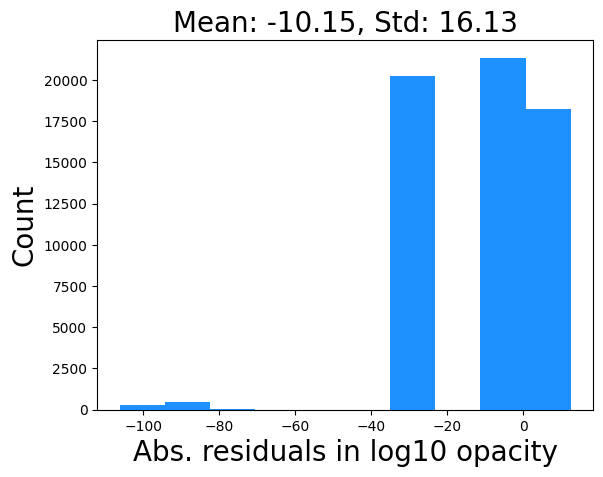

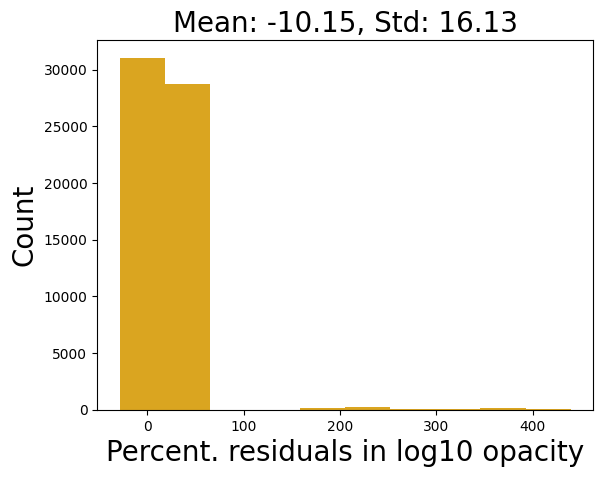

In [14]:
vals, orig_vals, abs_diffs, percent_diffs = calc_metrics(
    fitter, tp_undersample_factor=2, plot=True
);

This is a bit slower than some of the other methods, too.

In [16]:
np.median(np.abs(abs_diffs))

5.591503700142585

In [13]:
opac_obj.cross_section.nbytes / fitter.fitter_results[1].nbytes

24.375